In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [318]:
@np.vectorize
def f(x,t=0):  
    X = (x-t)/3
    return .3*(0<X)*(X<1)*np.abs(X)**0*np.abs(1-X)**0


def S(sf):
    #print(sf)
    return sf*(1-np.exp(-sf))

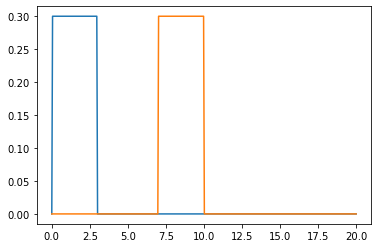

In [319]:
x = np.linspace(0,20,400)
dx = x[1]-x[0]
T=7
plt.plot(x, f(x))
plt.plot(x, f(x,T))

In [306]:
# Naive 
def N0Solve(x,F,dt,N):
    dx = x[1]-x[0]
    C = dt/dx
    flux = np.zeros_like(F)
    for n in range(N):
        for i in range(len(F)-2):
            flux[i+1] = -    C*(S(F[i+1])-S(F[i])) \
                        - .5*C*(1-C)*(S(F[i+2])-S(F[i+1])*2+S(F[i]))
        flux[0] = 0
        flux[-1] = 0
        F += flux
    return F
    

In [307]:
# flux limiter
def N1Solve(x,F,dt,N):
    dx = x[1]-x[0]
    C = dt/dx
    Nx = len(F)
    flux = np.zeros_like(F)
    for n in range(N):
        for i in range(Nx-2):
            Fp = S(F[i+2])-S(F[i+1])
            Fm = S(F[i+1])-S(F[i])
            Fmm = S(F[i])-S(F[(i-1)%Nx])
            Rp = (Fm+1e-10)/(Fp+1e-10)
            Rm = (Fmm+1e-10)/(Fm+1e-10)
            Lp = (Rp+np.abs(Rp))/(1+np.abs(Rp))
            Lm = (Rm+np.abs(Rm))/(1+np.abs(Rm))
            flux[i+1] = - C * ( 1 + .5*(1-C)*(Lp/Rp-Lm) )*Fm
        flux[0] = 0
        flux[-1] = 0
        F += flux
    return F

In [320]:

dt = dx/2
T=15
N = int(T/dt)
F1 = N0Solve(x, f(x,1), dt, N)
F2 = N1Solve(x, f(x,1), dt, N)


/tmp/ipykernel_80787/3936572486.py:9: RuntimeWarning: overflow encountered in exp
  return sf*(1-np.exp(-sf))
/tmp/ipykernel_80787/2680290651.py:9: RuntimeWarning: invalid value encountered in double_scalars
  - .5*C*(1-C)*(S(F[i+2])-S(F[i+1])*2+S(F[i]))
/tmp/ipykernel_80787/2680290651.py:8: RuntimeWarning: invalid value encountered in double_scalars
  flux[i+1] = -    C*(S(F[i+1])-S(F[i])) \


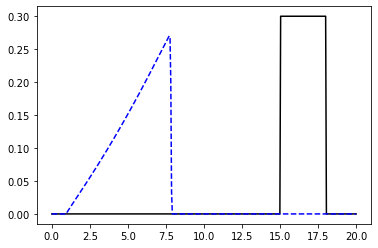

In [321]:
plt.plot(x, f(x,T), 'k-')
plt.plot(x, F1, 'r:')
plt.plot(x, F2, 'b--')